Avant toute chose, récupérer le code des TP précédents en exécutant cette cellule cachée.

> Attention à bien copier le dossier code et son contenu au même endroit que ce notebook.

In [ ]:
# «machinerie» de pytest
import pytest
import ipytest
ipytest.autoconfig()

# ajustement du sys.path
import sys, os
if not sys.path[0].endswith("code"): # pour éviter de re-modifier sys.path
    # sys.path est une liste contennant tous les dossiers où python
    # recherche les modules/paquets chargés avec import.
    # le premier d'entre eux est le répertoire courant,
    # modifions le de façon à ce qu'il pointe sur le dossier «code» du
    # répertoire courant.
    sys.path[0] = os.path.join(sys.path[0], "code")

from noeud_bin_p2 import NoeudBin

puis, utiliser la table des matières.

# Évaluation d'un arbre «arithmétique»

Nous reprenons l'arbre déjà donné plus tôt.

<p style="text-align: center;">
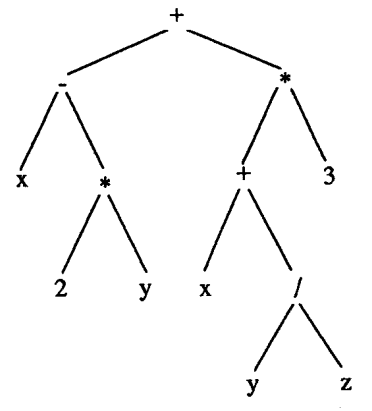
</p>

**Question1**: Combien vaut l'expression qu'il représente si on prend $x=5$, $y=3$ et $z=2$ ? ____

18.5

Voici pour rappel comment le représenter à l'aide de «noeuds binaires»

In [ ]:
@pytest.fixture()
def expr1():
    N = NoeudBin # alias
    return N("+",
        N("-",
            N(5),
            N("*", N(2), N(3)),
        ),
        N("*",
            N("+",
                N(5),
                N("/", N(3), N(2)),
            ),
            N(3),
        ),
    )

**Question 2**: Dessiner un autre arbre arithmétique et créer une «fixture» pour le représenter.

In [ ]:
# Par exemple, x^2-(5/3)x+3 avec x=6
# conseil: dessiner l'arbre avant de le coder!
@pytest.fixture()
def expr2():
    N = NoeudBin # alias
    pass

In [ ]:
# Par exemple, pour x^2-(5/3)x+3 avec x=6
@pytest.fixture()
def expr2():
    N = NoeudBin # alias
    # il y a plusieurs solutions...
    return N("+",
              N("-",
                 N("**", N(6), N(2)), # ou N("*", N(6), N(6))
                 N("*", 
                   N("/", N(5), N(3)),
                   N(6),
                  ),
               ),
              N(3),
            )

On souhaite implémenter une fonction `evaluer(expr)` qui renvoie la valeur d'un arbre binaire `expr` représentant une expression arithmétique. On supposera que:
1. ses noeuds internes sont doubles et contiennent un opérateur arithmétique
   sous la forme d'une chaîne parmi `'+'`, `'-'`, `'*'`, `'/'`, `'**'`.
2. les noeuds externes contiennent des nombres.


**Question 3**: Écrire un scénario de test pour les deux expressions précédentes.

In [ ]:
%%run_pytest[clean]

def test_evaluer(expr1, expr2):
    pass

In [ ]:
%%run_pytest[clean]

def test_evaluer(expr1, expr2):
    # méfiance dans les tests d'égalités avec les flottants... (ex: 0.1+0.1+0.1==0.3 donne False!)
    delta = 1e-10 # précision
    assert abs(evaluer(expr1) - 18.5) < delta 
    assert abs(evaluer(expr2) - 29.0) < delta

**Question 4**: Implémenter la fonction `evaluer`.

In [ ]:
def evaluer(expr):
    """On suppose que expr est le noeud racine d'un arbre binaire «arithmétique».
    C'est-à-dire que:
    1. ses noeuds internes sont doubles et contiennent un opérateur arithmétique
       sous la forme d'une chaîne parmi "+", "-", "*", "/", "**".
    2. les noeuds externes contiennent des nombres.
    On renvoie alors la valeur de l'expression arithmétique qu'il représente.
    """
    pass

In [ ]:
def evaluer(expr):
    """On suppose que expr est le noeud racine d'un arbre binaire «arithmétique».
    C'est-à-dire que:
    1. ses noeuds internes sont doubles et contiennent un opérateur arithmétique
       sous la forme d'une chaîne parmi "*", "+", "-",
    2. les noeuds externes contiennent des nombres.
    On renvoie alors la valeur de l'expression arithmétique qu'il représente.
    """
    if expr.est_feuille():
        return expr.valeur
    op = expr.valeur
    a = evaluer(expr.gauche)
    b = evaluer(expr.droit)
    if op == "+":
        return a + b
    if op == "-":
        return a - b
    if op == "*":
        return a * b
    if op == "/":
        return a / b
    if op == "**":
        return a ** b

# Arbre binaire avec pointeur parent

Bien souvent, pour des raisons d'efficacité entre autres, on modèlise les noeuds d'un arbre binaire en leur ajoutant un attribut **parent** de façon à les faire «pointer» vers le noeud immédiatement supérieur (sauf pour la racine qui pointe vers `None`).

Ainsi, la représentation de l'arbre

               A
              / \
             B   C 
                / \
               D   E

peut être schématisée ainsi:

<p style="text-align: center;">
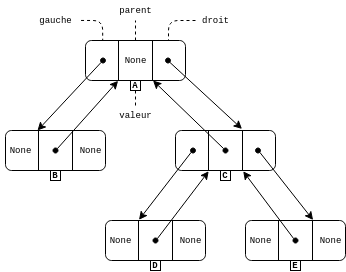
</p>

Pour représenter les noeuds, on peut - *heureusement* - récupérer le travail déjà accompli pour `NoeudBin` et définir une nouvelle classe `NoeudBin2` sur la base de la première:

In [ ]:
class NoeudBin2(NoeudBin):
    def __init__(self, valeur, gauche=None, droit=None, parent=None):
        # appel du «constructeur» de NoeudBin
        super().__init__(valeur, gauche, droit)
        self.parent = parent
        # On fait pointer les enfants vers ce noeud
        if isinstance(self.gauche, NoeudBin2):
            self.gauche.parent = self
        if isinstance(self.droit, NoeudBin2):
            self.droit.parent = self

L'intérêt est qu'une instance de `NoeudBin2` dispose de toutes les méthodes de `NoeudBin`: inutile de les réécrire (ouf!).

On peut alors créer des «fixtures» similaires à celles qu'on avait précédemment:

In [ ]:
@pytest.fixture()
def pedigree():
    N = NoeudBin2 # alias pour raccourcir
    return N("Zoé",
             N("Belle",
               N("Rose"),
               N("Eclair",
                 None,
                 N("Mistigri", N("Luna")),
                 ),
               ),
             N("Tonnerre",
               N("Nébuleuse"),
               N("Adrien", N("Mirabelle"))
              )
            )

Certaines méthodes deviennent alors plus naturelles et surtout plus efficaces car il est à présent possible de «remonter» le long d'une branche.

Par exemple, il est relativement simple d'écrire une méthode pour calculer la **profondeur** d'un noeud.

Commençons par le test. On rappel que `capsys` est un objet spécial de *pytest* qui permet de récupérer ce qui a été écris sur la *sortie standard*:
1. on utilise une fonction qui écrit sur la sortie standard avec des `print`,
2. on appelle `capsys.readouterr()` qui renvoie un 2-tuples: le premier élément capte la *sortie standard* (la seule qui nous intéresse), le second la sortie d'erreur (que nous n'utiliserons pas).

In [ ]:
%%run_pytest[clean]

def test_profondeur(pedigree, capsys):
    pedigree.parcours_prefixe(lambda n: print(n.profondeur()))
    out, _ = capsys.readouterr()
    assert out == ___

In [ ]:
%%run_pytest[clean]

def test_profondeur(pedigree, capsys):
    pedigree.parcours_prefixe(lambda n: print(n.profondeur()))
    out, _ = capsys.readouterr()
    assert out == "0\n1\n2\n2\n3\n4\n1\n2\n2\n3\n"

In [ ]:
def profondeur(self):
    """Renvoie la profondeur du noeud courant."""
    pass

NoeudBin2.profondeur = profondeur
del profondeur

In [ ]:
def profondeur(self):
    """Renvoie la profondeur du noeud courant."""
    p = -1
    courant = self
    while courant:
        p += 1
        courant = courant.parent
    return p

NoeudBin2.profondeur = profondeur
del profondeur

De même, on peut «redéfinir» les méthodes `est_ancetre(n)` et `occurrence()` afin de les rendre plus efficaces. Cela a pour effet de «cacher» les anciennes méthodes.

Bien sûr, on peut récupérer nos anciens tests

In [ ]:
%%run_pytest[clean]

def test_est_ancetre(pedigree):
    zoe = pedigree
    eclair = zoe.gauche.droit
    luna = eclair.droit.gauche
    mirabelle = zoe.droit.droit.gauche
    for n in [zoe, eclair, luna, mirabelle]:
        assert zoe.est_ancetre(n)
    assert eclair.est_ancetre(luna)
    assert not mirabelle.est_ancetre(luna)

Pour `occurrence` nous n'en avions par écrit, compléter celui-là:

In [ ]:
%%run_pytest[clean]

def test_occurrence(pedigree, capsys):
    pedigree.parcours_prefixe(lambda n: print(n.occurrence()))
    out, _ = capsys.readouterr()
    assert out == ____

In [ ]:
%%run_pytest[clean]

def test_occurrence(pedigree, capsys):
    pedigree.parcours_prefixe(lambda n: print(n.occurrence()))
    out, _ = capsys.readouterr()
    assert out == "\n0\n00\n01\n011\n0110\n1\n10\n11\n110\n"

Reste à ré-implémenter ces méthodes:

In [ ]:
def est_ancetre(self, n):
    """Renvoie True si le noeud courant est un ancêtre du noeud fourni en argument.
    Un noeud n1 est un ancêtre d'un noeud n2 si n2 fait partie de l'arbre enraciné
    au noeud n1.
    Est plus efficace que la version récursive de NoeudBin."""
    pass

NoeudBin2.est_ancetre = est_ancetre
del est_ancetre

In [ ]:
def est_ancetre(self, n):
    """Renvoie True si le noeud courant est un ancetre du noeud fourni en argument.
    Un noeud n1 est un ancêtre d'un noeud n2 si n2 fait partie de l'arbre enraciné
    au noeud n1.
    Est plus efficace que la version récursive de NoeudBin."""
    courant = n
    while courant:
        if courant is self:
            return True
        courant = courant.parent
    return False

NoeudBin2.est_ancetre = est_ancetre
del est_ancetre

In [ ]:
def occurrence(self):
    """Renvoie l'occurrence du noeud courant.
    L'occurrence de la racine est '', et si occ est l'occurrence d'un noeud,
    celle de son fils gauche est (occ + '0'), et celle de son fils droit (occ + '1')."""
    occ = ""
    courant = self
    while courant.parent:
        pass
    return occ

NoeudBin2.occurrence = occurrence
del occurrence

In [ ]:
def occurrence(self):
    """Renvoie l'occurrence du noeud courant.
    L'occurrence de la racine est '', et si occ est l'occurrence d'un noeud,
    celle de son fils gauche est (occ + '0'), et celle de son fils droit (occ + '1')."""
    occ = ""
    courant = self
    while courant.parent:
        if courant.parent.gauche is courant:
            occ = "0" + occ
        else:
            occ = "1" + occ
        courant = courant.parent
    return occ

NoeudBin2.occurrence = occurrence
del occurrence